## Making A simple utility to measure image quality


Specifically the intensity of a region of signal vs a region of background

In [1]:

import mda_simulator

import napari
from pymmcore_plus import CMMCorePlus

from mda_simulator import ImageGenerator
import useq
from mda_simulator.mmcore import FakeDemoCamera
import numpy as np

v = napari.Viewer()
dw, main_window = v.window.add_plugin_dock_widget("napari-micromanager")

core = CMMCorePlus.instance()
core.loadSystemConfiguration('config.cfg')

gen = ImageGenerator(N=4000)
# gen = ImageGenerator(N=1, snr = 1, noise_scale=2,extent=.5, step_scale=(8, 4))


# Create an object that will modify the `snap` method of the CMMCorePlus
# instance to return images from our ImageGenerator
fake_cam = FakeDemoCamera(
    gen,
    timing=1,  # how many real world seconds to wait to step the ImageGenerator time
    core=core,
)
core.setConfig("Channel", "DAPI")

Gtk-Message: 22:31:42.042: Failed to load module "appmenu-gtk-module"


## Demo

1. Make a labels layer
2. Show how to draw on that layer


Now you can access the layers directly from napari

In [3]:
v.layers

[<Image layer 'preview' at 0x7fac885b0940>, <Labels layer 'Labels' at 0x7fabdc088550>]

In [4]:
preview = v.layers[0]
labels = v.layers[1]

In [12]:
labels.data
img = preview.data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(foreground)

## exercise

Use the background and foreground to calculate a 

In [8]:
background = labels.data == 1
foreground = labels.data == 2

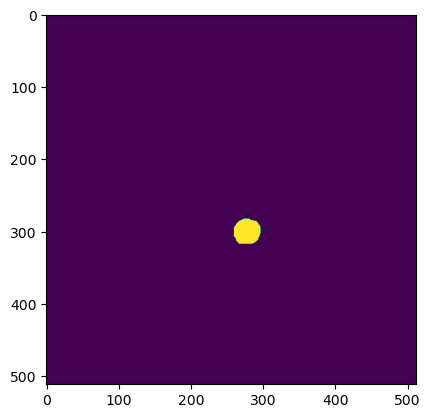

In [11]:
img[foreground].mean() / img[background].mean()

15.293289779182356

## Demo - A widget to display

Here an notebook widget - but in general can integrate into Napari (or display however you want)

In [17]:
import ipywidgets as widgets

In [25]:
output = widgets.Output()
display(output)

Output()

In [28]:
ratio = img[foreground].mean() / img[background].mean()
output.clear_output()
with output:
    print(f'Foreground to background ratio: {ratio:.2f}')

## Updating as new live mode images come


Using signals


- `continuousSequenceAcquisitionStarted`
- `sequenceAcquisitionStopped`

In [ ]:

from qtpy.QtCore import QTimer
streaming_timer = QTimer()
streaming_timer.timeout.connect(self._update_viewer)
streaming_timer.start(int(self._mmc.getExposure()))